## Set Up

### Import & define & read ds

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def get_raw_table(src_path: str, dst_path, column_labels: list, filter_dict: dict = None):
    '''
    Trích các cột cần trong dim job và đưa ra 1 file csv mới là tham số truyền vô
    Thêm jobid va`o
    Lấy các cột trong column_labels
    Lọc theo dict với mỗi key là array of not accepted value
    '''
    df = pd.read_csv(src_path, encoding='ISO-8859-1')

    for col, not_value in filter_dict.items():
        df = df[~df[col].isin(not_value)]

    df = df[column_labels]
    df.reset_index(drop=True, inplace=True)

    df.rename({
        'PERSONID': 'person_id',
        'PRDTIND1': 'detail_industry',
        'PRDTOCC1': 'detail_occupation',
        'PRTAGE': 'age',
        'PEMARITL': 'marital_status',
        'PESEX': 'sex',
        'PEEDUCA': 'education_level',
        'PTDTRACE': 'race',
        'PRFTLF': 'ft/pt',
        'GESTFIPS': 'state',
        'GTCBSA': 'metropolitan',
        'PEHRUSL1': 'hours_a_week',
        'PUHROT1': 'last_week_OT', #1 yes, 2 no
        'PUHROT2': 'additional_hours_OT',
        'PEERNHRO': 'usual_hours',
        'PRERNHLY': 'hourly_rate',
        'PRERNWA': 'weekly_rate',
        'PEDISEAR': 'deaf_diff_hearing',
        'PEDISEYE': 'blind_diff_seeing_glass',
        'PEDISREM': 'diff_concerntrating_remembering_decision',
        'PEDISPHY': 'diff_climbing_walking',
        'PEDISDRS': 'diff_dressing_bathing',
        'PRDISFLG': 'disability_issue', #1 yes, 2 no
    },
    axis=1, inplace=True)
    
    #print(df.head())
    df.to_csv(dst_path, index=False)

In [27]:
columns_to_get = ['PERSONID', 'PRDTIND1', 'PRDTOCC1', 'PRTAGE', 'PEMARITL', 'PESEX', 'PEEDUCA', 'PTDTRACE', 'PRFTLF', 'GTCBSA',
                   'PEHRUSL1', 'PEDISEAR', 'PEDISEYE', 'PEDISREM', 'PEDISPHY', 'PEDISDRS', 'PRDISFLG']
dict_to_filter = {
    #Only employed
    'PREMPNOT': [-1,2,3,4],
    #Only have 1 job
	'PEMJOT': [-1,1], 
    #Only if they know which city they 're in => which metropolitan is not 0
    'GTINDVPC': [0],
    #'PRDISFLG': [2]
}

get_raw_table('./src/filtered_cps.csv', './temp/employment.csv', column_labels= columns_to_get, filter_dict=dict_to_filter)
test = pd.read_csv('./temp/employment.csv')
print(test.head())

   person_id  detail_industry  detail_occupation  age  marital_status  sex  \
0       4964               42                 10   51               1    1   
1       4965               41                 10   66               6    2   
2       4966               51                  1   47               4    1   
3       4971               45                 15   48               4    2   
4       4972               38                  1   31               6    1   

   education_level  race  ft/pt  metropolitan  hours_a_week  \
0               44     1      1         38060            50   
1               44     1      1         38060            40   
2               44     1      1         38060            45   
3               43     1      1         38060            40   
4               40     1      1         38060            48   

   deaf_diff_hearing  blind_diff_seeing_glass  \
0                  2                        2   
1                  2                        2   
2    

### Convert Foreign key to Value 

In [28]:
detail_industry_df = pd.read_csv('./src/detail_industry.csv')
detail_occupation_df = pd.read_csv('./src/detail_occupation.csv')
marital_status_df = pd.read_csv('./src/marital_status.csv')
education_df = pd.read_csv('./src/education.csv')
race_df = pd.read_csv('./src/race.csv')
metropolitan_df = pd.read_csv('./src/metropolitan.csv')

raw_df = pd.read_csv('./temp/employment.csv')
raw_df = pd.merge(raw_df, detail_industry_df, left_on='detail_industry', right_on='detail_industry_id')
raw_df = pd.merge(raw_df, detail_occupation_df, left_on='detail_occupation', right_on='detail_occupation_id')
raw_df = pd.merge(raw_df, marital_status_df, left_on='marital_status', right_on='marital_status_id')
raw_df = pd.merge(raw_df, education_df, left_on='education_level', right_on='education_id')
raw_df = pd.merge(raw_df, race_df, left_on='race', right_on='race_id')
raw_df = pd.merge(raw_df, metropolitan_df, left_on='metropolitan', right_on='metropolitan_id')

raw_df.drop(['detail_industry','detail_occupation', 'marital_status','education_level', 'race', 'metropolitan',
             'detail_industry_id', 'detail_occupation_id', 'marital_status_id', 'education_id', 'race_id', 'metropolitan_id', 'foreign_state_id'],
            axis=1, inplace=True)
raw_df.rename(mapper={
    'detail_industry_value': 'industry',
    'detail_occupation_value': 'occupation',
    'marital_status_value': 'marital_status',
    'education_value': 'education',
    'race_value': 'race',
    'metropolitan_value': 'metropolitan',
}, axis=1, inplace=True)

print(raw_df.head())


   person_id  age  sex  ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    1      1            50                  2   
1       5069   39    2      1            40                  2   
2       5068   40    1      1            40                  2   
3       5199   56    2      1            40                  2   
4       5712   46    1      1            60                  2   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                        2                                         2   
1                        2                                         2   
2                        2                                         2   
3                        2                                         2   
4                        2                                         2   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                      2                      2                 2   
1                      2        

### Discover the data for insights

### Explore cols 's values and count , examples


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7872
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   person_id                                 7873 non-null   int64 
 1   age                                       7873 non-null   int64 
 2   sex                                       7873 non-null   int64 
 3   ft/pt                                     7873 non-null   int64 
 4   hours_a_week                              7873 non-null   int64 
 5   deaf_diff_hearing                         7873 non-null   int64 
 6   blind_diff_seeing_glass                   7873 non-null   int64 
 7   diff_concerntrating_remembering_decision  7873 non-null   int64 
 8   diff_climbing_walking                     7873 non-null   int64 
 9   diff_dressing_bathing                     7873 non-null   int64 
 10  disabili

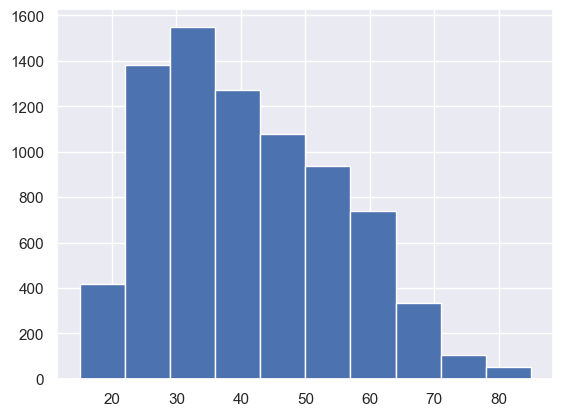

In [29]:
print('\n____________ Dataset info ____________')
print(raw_df.info())
print('\n____________ Some Data Examples ____________')
#print(raw_df.head(2))
print('\n____________ Features Values and count ____________')

#region Print all values and count of each feature
print(raw_df['age'].value_counts(),'\n')
print(raw_df['hours_a_week'].value_counts(),'\n') #-4 have 443 values => have to fillby a value
print(raw_df['industry'].value_counts(),'\n')
print(raw_df['occupation'].value_counts(),'\n')
print(raw_df['marital_status'].value_counts(),'\n')
print(raw_df['education'].value_counts(),'\n')
print(raw_df['race'].value_counts(),'\n')
print(raw_df['metropolitan'].value_counts(),'\n')
#endregion

raw_df['age'].hist()
print("Num:",len(raw_df[raw_df['hours_a_week'] == 0])) #5 giá trị 0
#raw_df['hours_a_week'].hist()


## Preprocessing

### Replace value for cols

In [30]:
'''
We can use 
+map function: data['sex'].replace({0:'Female',1:'Male'},inplace=True)
+apply function: data['sex'] = data['sex'].apply({1:'Male', 0:'Female'}.get)
+replace function: data['sex']=data['sex'].map({0:'Female',1:'Male'}) -> non-destructive and can run multiple time
'''
#for binary cols
raw_df['sex'].replace({1: 'male', 2: 'female'}, inplace=True)
raw_df['ft/pt'].replace({1: 'full-time', 2: 'part-time'}, inplace=True)
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].replace({1: 1, 2: 0})
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].astype(bool)
print(raw_df.head())

   person_id  age     sex      ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    male  full-time            50              False   
1       5069   39  female  full-time            40              False   
2       5068   40    male  full-time            40              False   
3       5199   56  female  full-time            40              False   
4       5712   46    male  full-time            60              False   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                    False                                     False   
1                    False                                     False   
2                    False                                     False   
3                    False                                     False   
4                    False                                     False   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                  False                  False            

### Split True/False cols for later use when inputting in the mlextend

In [31]:
keep_df = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']]
raw_df.drop(['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue'], inplace=True, axis=1)
#print(keep_df.head())
#print(raw_df.head())

### Binning numerical 

In [32]:
bins_hours_week = [-5,0,10,20,30,40,50,60,99]
labels_hours_week = ["Vary hr", "Little hr", "10-20hr", "20-30hr","30-40hr","40-50hr", "Much hr","Extreme hr"]
raw_df['hours_a_week'] = pd.cut(raw_df['hours_a_week'], bins=bins_hours_week, labels=labels_hours_week)

bins_age = [0, 10, 20, 30, 40, 50,60, 70, 80, 99]
labels_age = ["Child", "Teen", "20-30", "30-40","40-50", "50-60", "60-70","70-80","80+"]
raw_df['age'] = pd.cut(raw_df['age'], bins=bins_age, labels=labels_age)


## Fine - tune model

### Cluster category into single

In [33]:
#Gom class race khac only thanh 1 class duy nhat là other
raw_df['race'].replace({
    "American Indian, Alaskan Native Only":'Other race',
    "Hawaiian/Pacific Islander Only":'Other race',
    "White-Black":'Other race',
    "White-AI":'Other race',
    "White-Asian":'Other race',
    "White-HP":'Other race',
    "Black-AI":'Other race',
    "Black-Asian":'Other race',
    "Black-HP":'Other race',
    "AI-Asian":'Other race',
    "AI-HP":'Other race',
    "Asian-HP":'Other race',
    "W-B-AI":'Other race',
    "W-B-A":'Other race',
    "W-B-HP":'Other race',
    "W-AI-A":'Other race',
    "W-AI-HP":'Other race',
    "W-A-HP":'Other race',
    "B-AI-A":'Other race',
    "W-B-AI-A":'Other race',
    "W-A-HP":'Other race',
    "W-AI-A-HP":'Other race',
    "Other 3 Race Combinations":'Other race',
    "Other 4 and 5 Race Combinations":'Other race',
}, inplace=True)

#Gom class thanh wife issue
raw_df['marital_status'].replace({
    "MARRIED - SPOUSE ABSENT":'WIFE ISSUE',
    "WIDOWED":'WIFE ISSUE',
    "DIVORCED":'WIFE ISSUE',
    "SEPARATED":'WIFE ISSUE',
    
}, inplace=True)

### Drop some cols for focusing on important things

In [34]:
#remove some cols for fine-tune step
raw_df.drop(['industry', 'metropolitan'], axis=1, inplace=True)
# Uncomment this below line for seeing the focus effect
# raw_df.drop(['industry', 'metropolitan','race','ft/pt'], axis=1, inplace=True)
print(raw_df.head())

   person_id    age     sex hours_a_week  \
0       4964  50-60    male      40-50hr   
1       5069  30-40  female      30-40hr   
2       5068  30-40    male      30-40hr   
3       5199  50-60  female      30-40hr   
4       5712  40-50    male      Much hr   

                                          occupation  \
0  Healthcare practitioner and technical occupations   
1  Healthcare practitioner and technical occupations   
2                             Management occupations   
3                             Management occupations   
4                             Management occupations   

             marital_status                                     education  
0  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)  
1  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)  
2  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)  
3  MARRIED - SPOUSE PRESENT  MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)  
4  MARRIED - SPOUS

## Association Rule Setting Up

### Filter Specific value of category for better analysis, handling data imbalance

In [35]:
raw_df.to_csv('./temp/employment1.csv', index=False)
temp_df = pd.concat([raw_df, keep_df], axis=1)
temp_df = temp_df[temp_df['disability_issue'] == True]

### Explore Ds For fine tune insight

In [36]:
print('\n____________ Dataset info ____________')
print(temp_df.info())
print('\n____________ Some Data Examples ____________')
#print(raw_df.head(2))
print('\n____________ Features Values and count ____________')

#region Print all values and count of each feature
for col in temp_df.columns:
    print(temp_df[col].value_counts(),'\n')
#endregion


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 39 to 7848
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   person_id                                 215 non-null    int64   
 1   age                                       215 non-null    category
 2   sex                                       215 non-null    object  
 3   hours_a_week                              215 non-null    category
 4   occupation                                215 non-null    object  
 5   marital_status                            215 non-null    object  
 6   education                                 215 non-null    object  
 7   deaf_diff_hearing                         215 non-null    bool    
 8   blind_diff_seeing_glass                   215 non-null    bool    
 9   diff_concerntrating_remembering_decision  215 non-null  

### Plotting Insight for fine tune

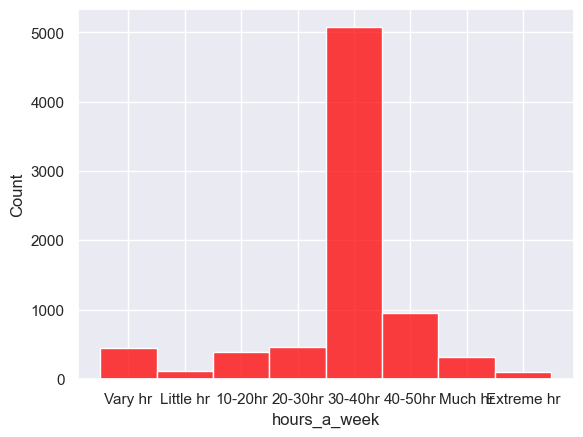

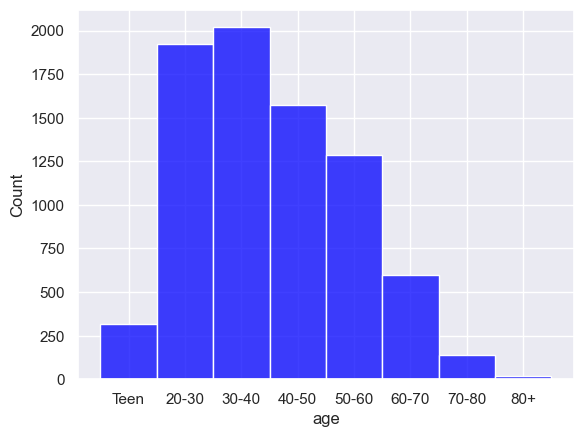

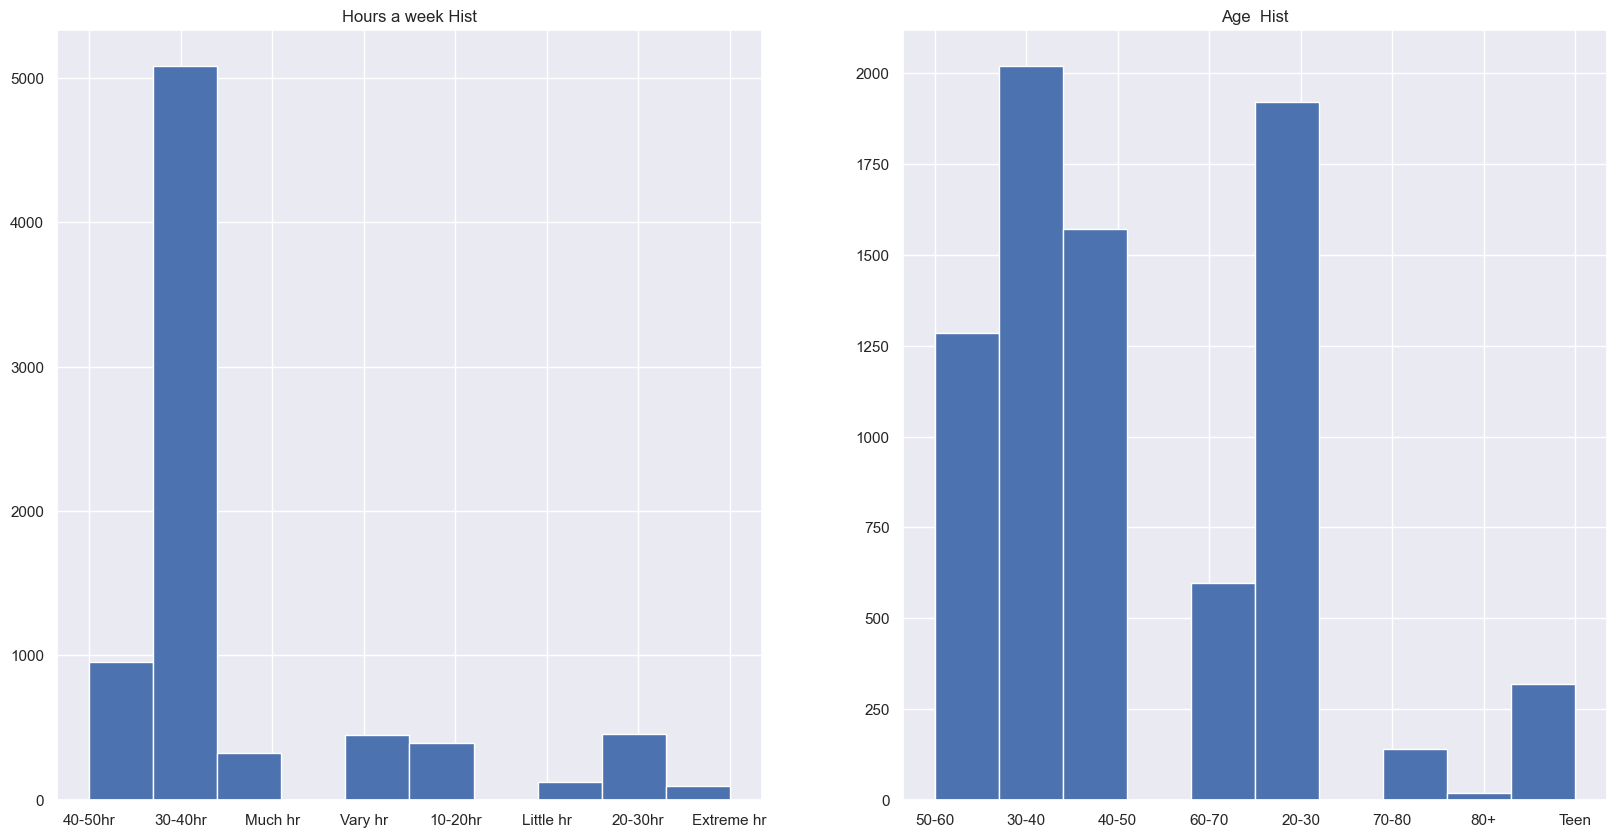

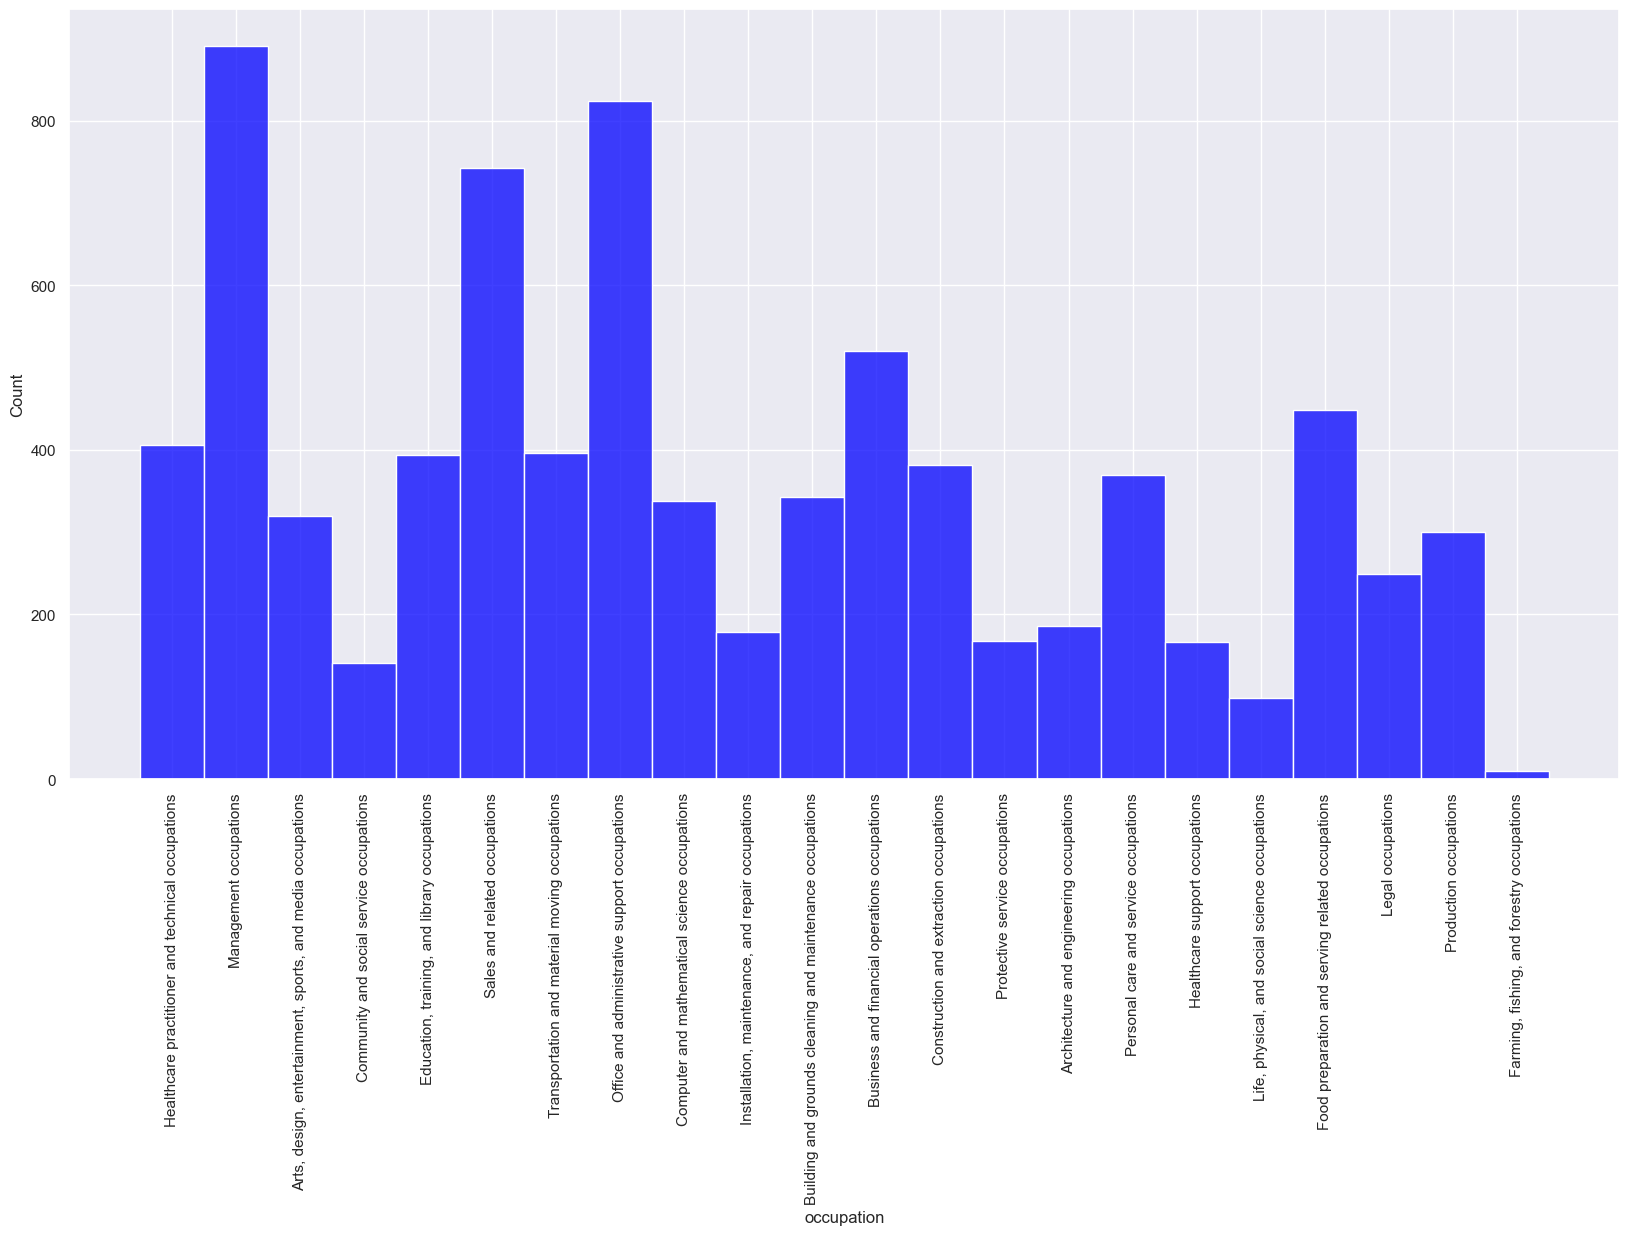

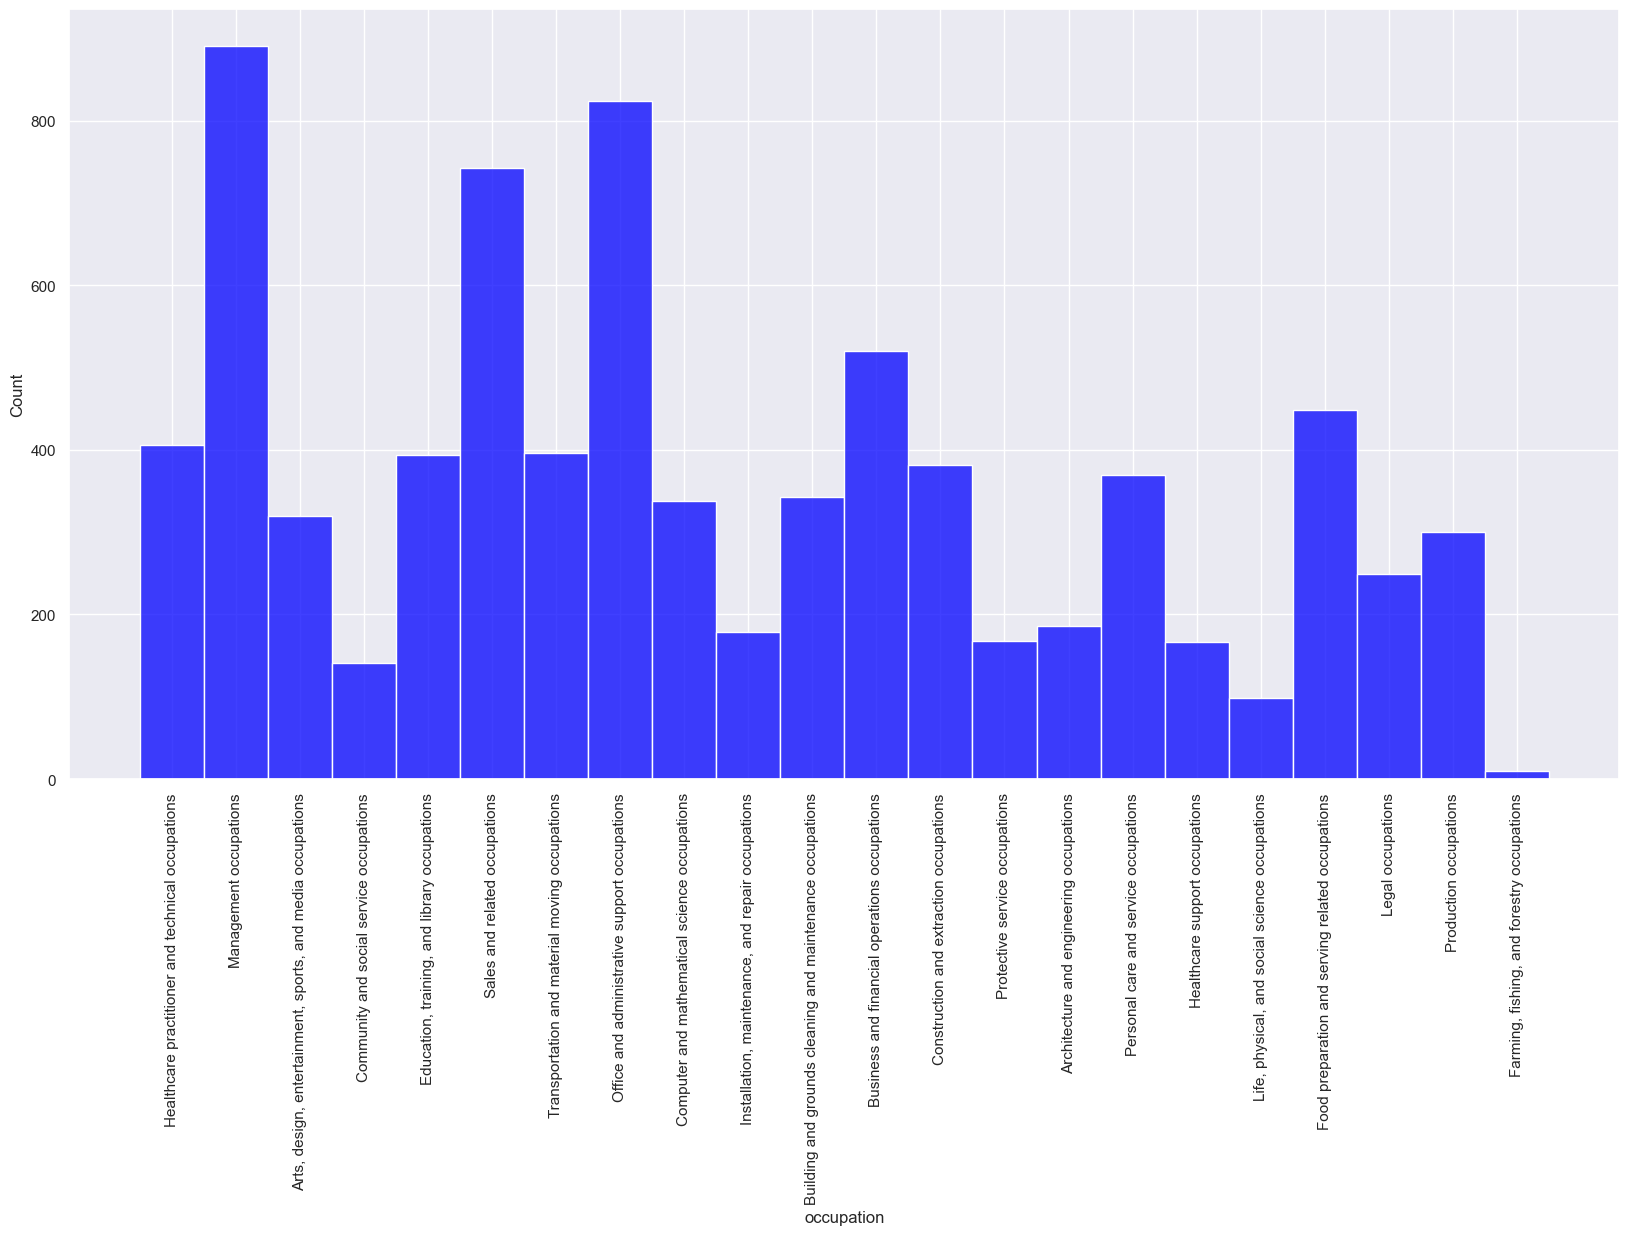

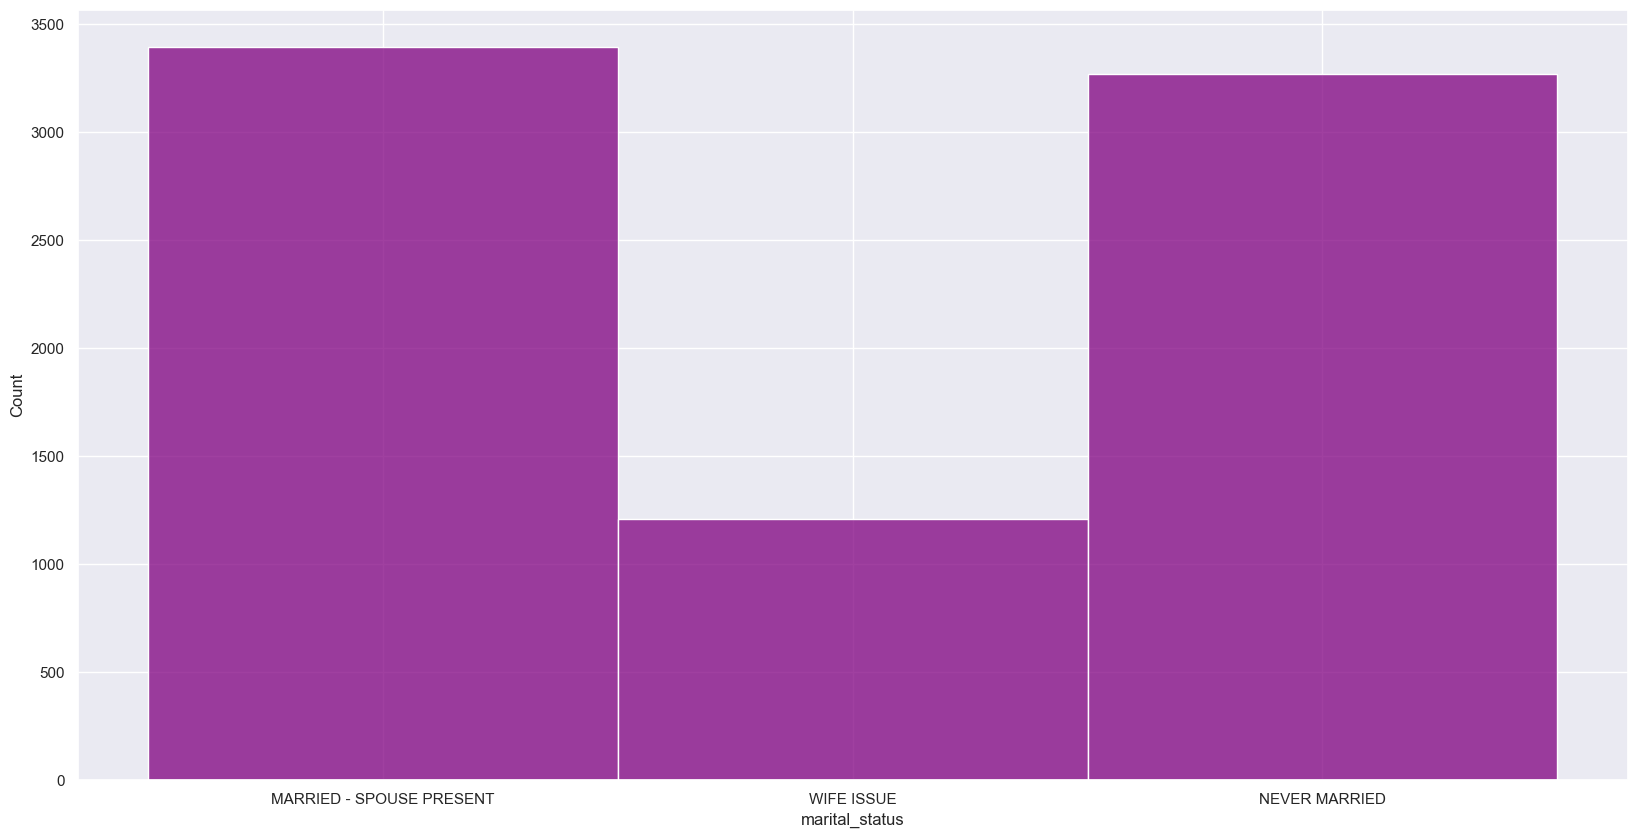

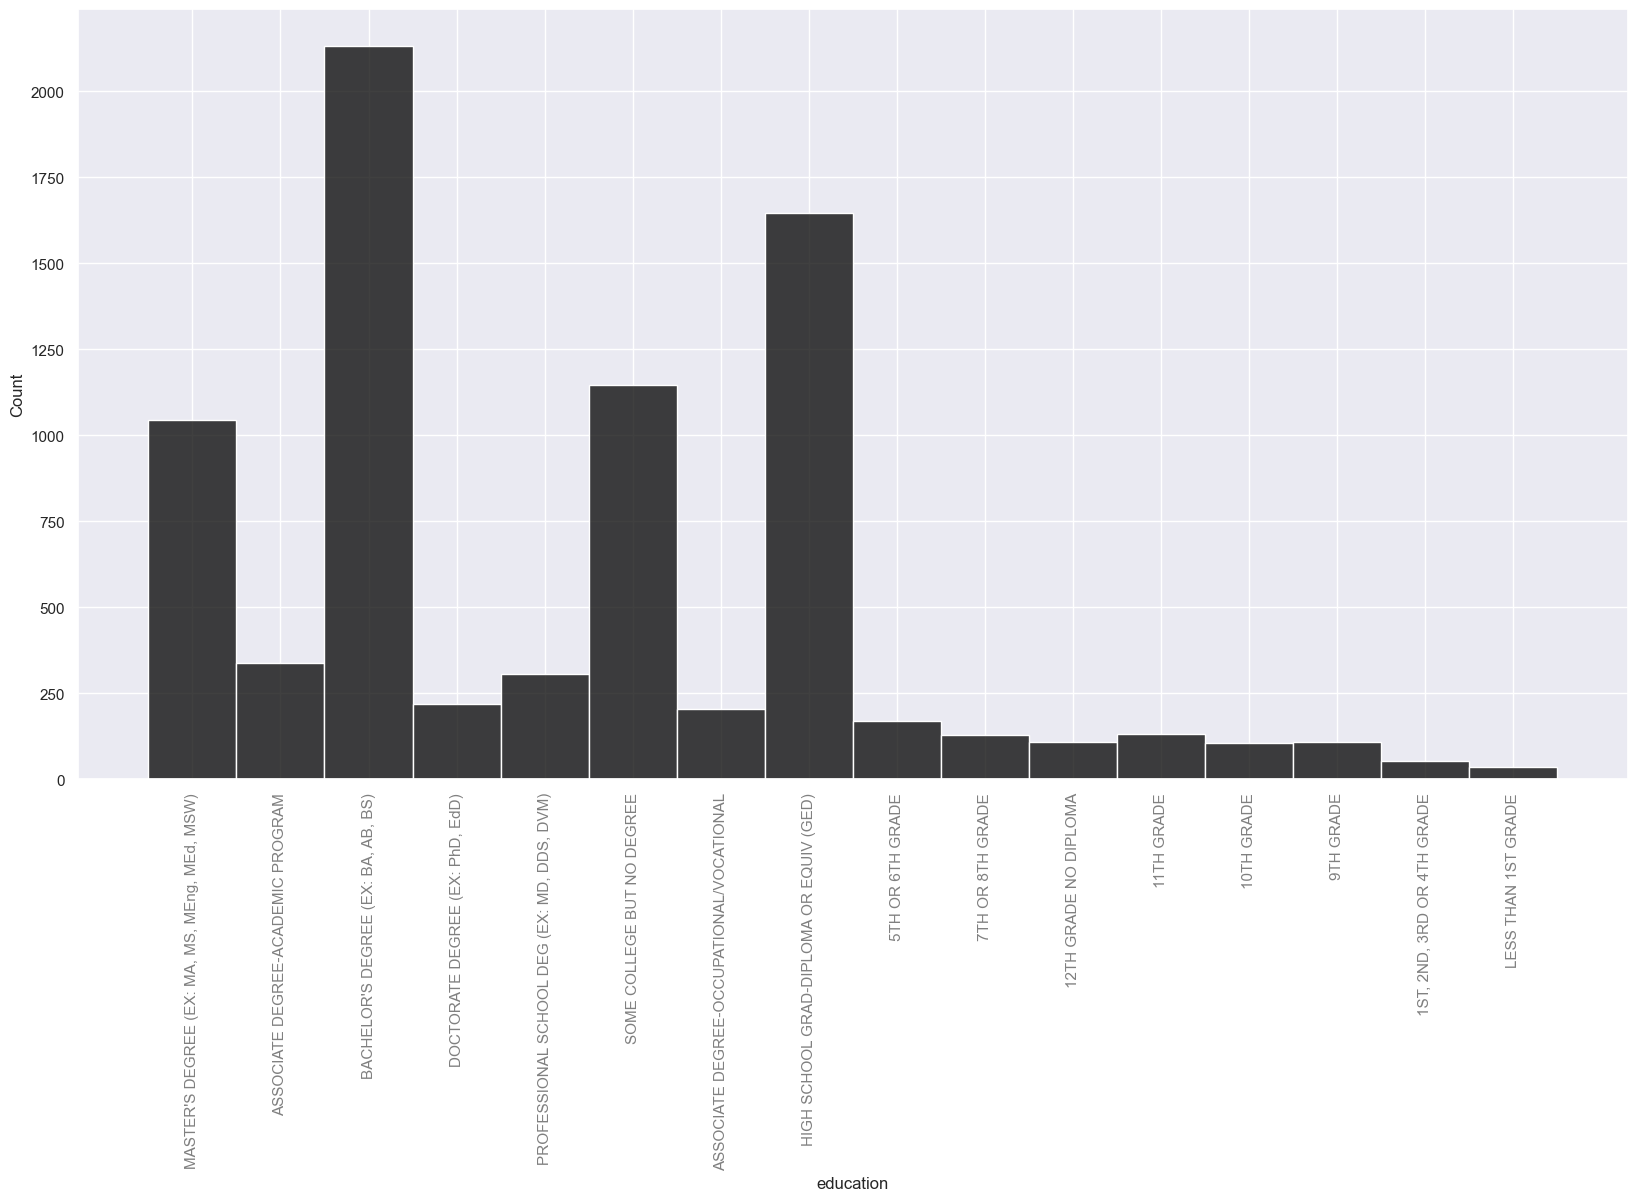

In [37]:
sns.histplot(raw_df['hours_a_week'], color='red')
plt.show()
sns.histplot(raw_df['age'], color='blue')
plt.show()
# px.histogram(raw_df,'hours_a_week')

fig_numerical, axes_numerical = plt.subplots(1,2, figsize=(20,10))
axes_numerical[0].hist(raw_df['hours_a_week'])
axes_numerical[0].set_title('Hours a week Hist')
axes_numerical[1].hist(raw_df['age'])
axes_numerical[1].set_title('Age  Hist')
plt.show()

sns.set_theme(style='darkgrid')
fig_industry, ax_industry = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_industry.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_industry)

fig_occupation, ax_occupation = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_occupation.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_occupation)

fig_marital, ax_marital = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['marital_status'], color='purple',ax=ax_marital)

fig_education, ax_education = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['education'], color='black',ax=ax_education)
ax_education.tick_params(axis='x', labelrotation=90, labelcolor='gray')

fig_race, ax_race = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['race'], color='green',ax=ax_race, )
ax_race.tick_params(axis='x', labelrotation=90, labelcolor='red')

## Association Rule


In [38]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

new_src_df = pd.read_csv('./temp/employment1.csv')
new_src_df.drop(['person_id'], inplace=True, axis=1)
dataset = []
for i in range(0, new_src_df.shape[0]):
    dataset.append([str(new_src_df.values[i,j]) for j in range(0, new_src_df.shape[1])])

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)

df = pd.concat([df, keep_df],axis=1)
df.head(2)
print(df.columns)
# print(type(oht_ary))
# print(oht_ary.shape)

Index(['10-20hr', '10TH GRADE', '11TH GRADE', '12TH GRADE NO DIPLOMA',
       '1ST, 2ND, 3RD OR 4TH GRADE', '20-30', '20-30hr', '30-40', '30-40hr',
       '40-50', '40-50hr', '50-60', '5TH OR 6TH GRADE', '60-70', '70-80',
       '7TH OR 8TH GRADE', '80+', '9TH GRADE',
       'ASSOCIATE DEGREE-ACADEMIC PROGRAM',
       'ASSOCIATE DEGREE-OCCUPATIONAL/VOCATIONAL',
       'Architecture and engineering occupations',
       'Arts, design, entertainment, sports, and media occupations',
       'BACHELOR'S DEGREE (EX: BA, AB, BS)',
       'Building and grounds cleaning and maintenance occupations',
       'Business and financial operations occupations',
       'Community and social service occupations',
       'Computer and mathematical science occupations',
       'Construction and extraction occupations',
       'DOCTORATE DEGREE (EX: PhD, EdD)',
       'Education, training, and library occupations', 'Extreme hr',
       'Farming, fishing, and forestry occupations',
       'Food preparation a

### Focus in a group and plot 

In [39]:
df = df[df['disability_issue'] == True]

### Drop some not necessary cols

In [40]:
df.drop(['disability_issue'], inplace=True, axis=1)

### AR

In [41]:
output = fpgrowth(df, min_support=0.02, use_colnames=oht.columns_)
output.head(20)

,support,itemsets
0,0.576744,(30-40hr)
1,0.562791,(male)
2,0.325581,(deaf_diff_hearing)
3,0.302326,(WIFE ISSUE)
4,0.139535,(60-70)
5,0.125581,(Sales and related occupations)
6,0.055814,(ASSOCIATE DEGREE-ACADEMIC PROGRAM)
7,0.437209,(female)
8,0.227907,(HIGH SCHOOL GRAD-DIPLOMA OR EQUIV (GED))
9,0.223256,(40-50)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction' 'zhangs_metric']
-------------------------------------
Configuration :  confidence  :  0.8
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
                                           antecedents  \
34   (Sales and related occupations, male, NEVER MA...   
164          (Construction and extraction occupations)   
193  (Construction and extraction occupations, MARR...   
194   (Construction and extraction occupations, 50-60)   
205  (Construction and extraction occupations, MARR...   
206   (Construction and extraction occupations, 50-60)   
215  (30-40hr, Construction and extraction occupati...   
216  (30-40hr, Construction and extraction occupati...   
218  (male, 50-60, Construction and extraction occu...   
219  (male, MARRIED - SPOUSE PRESENT, Construction ...   
229   (Construction and extraction occupations, 50-60)   
230  (Const

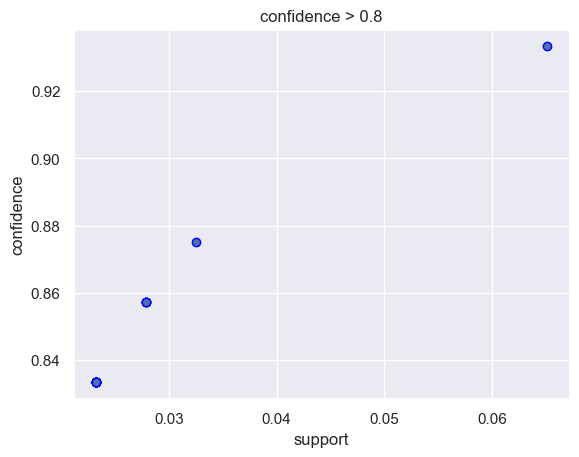

In [42]:
rules = association_rules(output, metric='zhangs_metric', min_threshold=0.7)
print (rules.columns.values)
print ('-------------------------------------')
print ('Configuration : ', 'confidence', ' : ', 0.8)
print ('-------------------------------------')

#override rules
rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1.0) & (rules['confidence']!=1) & (rules['zhangs_metric'] > 0.7)]
print(type(rules))
print (rules)
rules.to_csv('./temp/rules.csv', index=False)

support=rules['support']
confidence=rules['confidence']

plt.scatter(support, confidence, edgecolors='blue')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('confidence > 0.8')
plt.show()

## Conclusion: Data Imbalance  due to distribution
> We cannot oversampling or downsampling since it will affect other class  
> We can cluster multiple column into one but lost some info  
> We can drop some column  
> We can focus on a group of small record  